In [9]:
import fastf1 as ff1
import pandas as pd
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

# importando biblioteca que importa dados online da F1, alpem das bibliotecas de análise gráfica

In [3]:
# criando pasta na  raíz

ff1.Cache.enable_cache('cache')



In [6]:
# coletando dados de uma corrida em específico

quali = ff1.get_session(2021, 'Brazil', 'Q')


In [7]:
# colentando dados da classificação (método antigo)
laps = quali.load_laps(with_telemetry=True)

C:\Users\e009349\Anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver  9: Ignoring late data for a previously processed lap.The data may contain errors (previous: 9; current 10)
api         WARNING 	Driver 10: Ignoring late data for a previously processed lap.The data may contain errors (previous: 16; current 17)
api            INFO 	Data has been written to cache!
api      

In [30]:
# coletando dados da classificação (versão atual do fastf1)
year, grand_prix, session = 2022, 'italian', 'Q'
quali = ff1.get_session(year, grand_prix, session)
quali.load() #comando crad para a nova versão do fastf1

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '63', '4', '3', '10', '14', '31', '77', '45', '24', '22', '6', '5', '18', '20', '47']


In [29]:
# coletando dados da corrida
year, grand_prix, session = 2022, 'Italian', 'R'
quali = ff1.get_session(year, grand_prix, session)
quali.load() #comando  para a nova versão do fastf1

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track sta

In [26]:
# Coletando dados específicos. No caso, Charles Leclerc e Sergio Perez
driver_1, driver_2 = 'PER', 'LEC'

In [38]:
# agora, vamos selecionar as voltas dos dois ,pelo objeto .laps
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)


#selecionando a melhor volta de cada um
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

#adicionando telemetria e coluna de distância
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

In [40]:
#adicionando color para distinguir os dois pilotos
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

In [43]:
# adicionado estimativa de gap entre os pilotos
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

In [52]:
# adicionando o plot
plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"


In [53]:
# visualizando detalhes sobre a corrida
quali.event

RoundNumber                                                   16
Country                                                    Italy
Location                                                   Monza
OfficialEventName    FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2022
EventDate                                    2022-09-11 17:00:00
EventName                                     Italian Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                                 2022-09-09 14:00:00
Session2                                              Practice 2
Session2Date                                 2022-09-09 17:00:00
Session3                                              Practice 3
Session3Date                                 2022-09-10 13:00:00
Session4                                              Qualifying
Session4Date                                 2022-09-10 16:00:00
Session5                 

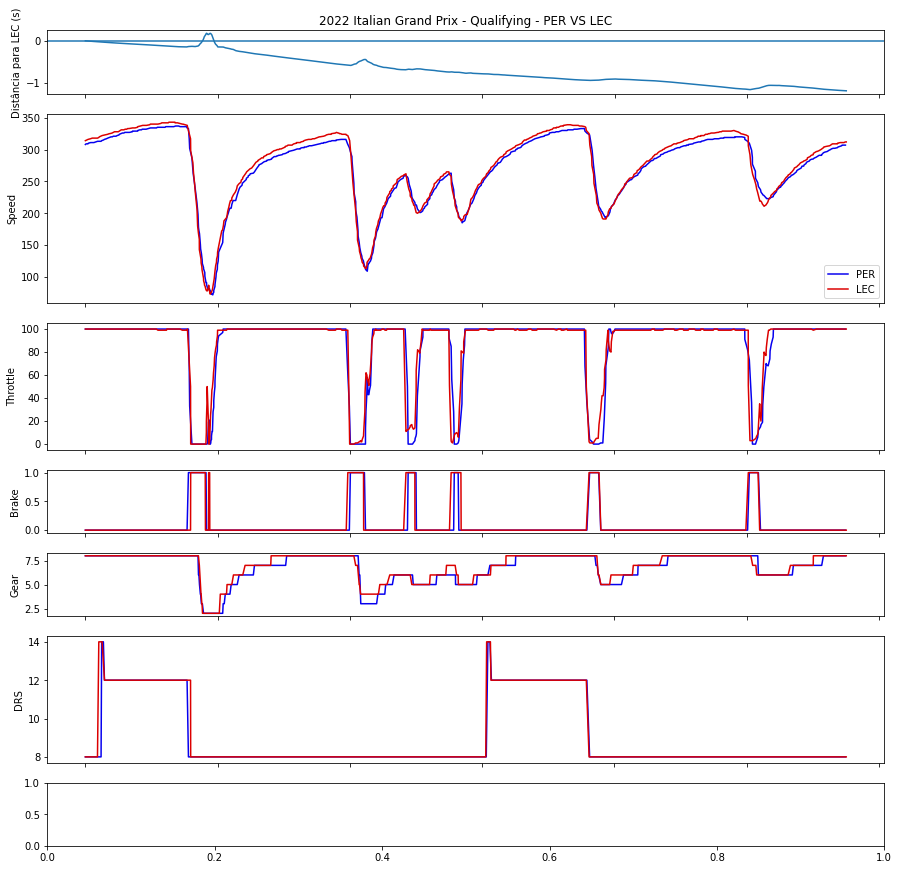

In [83]:
#Criando o plot
plt.rcParams['figure.figsize'] = plot_size

# Criando subplotes com tamanhos diferentes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Título do Plot
ax[0].title.set_text(plot_title)

# Linha Delta
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Distância para {driver_2} (s)")
         
    
# Linha de Velocidade
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], 
           label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], 
           label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Linha de Troca de Marchas
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], 
           label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], 
           label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Linha de Brecadas
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], 
           label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], 
           label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Linha de RPM

ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], 
           label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], 
           label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# Linha de DRS

ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], 
           label=driver_1, color=ff1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], 
           label=driver_2, color=ff1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='DRS')

# ocultando labels 

for a in ax.flat:
    
    a.label_outer()
    
# Criando arquivo para Download

plt.savefig(plot_filename, dpi=300)
plt.show()